In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import pickle

In [2]:
baseball_df = pd.read_pickle("data/aggregated_data.pkl")

In [3]:
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,1,4.0,1,0.0,0.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,2,4.0,1,0.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,3,4.0,1,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,1,4.0,1,0.0,0.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,35,1,5.0,0,0.0,0.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,2.0,...,15.084946,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717580,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,57,3,7.0,0,0.0,2.0,...,7.676146,17.788908,-1.050967,2.320313,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717581,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,58,5,7.0,0,2.0,2.0,...,16.145367,12.247181,-0.841397,2.487577,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park
717582,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,58,6,7.0,0,2.0,2.0,...,8.844625,2.210124,-0.000184,1.811733,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park


In [4]:
high_pressure_df = baseball_df[(baseball_df['strikes'] == 2.0) & 
                               (baseball_df['balls'].isin([0, 1])) & 
                               (baseball_df['pitcherthrows'] == 'R')].copy()

In [5]:
rays_df = baseball_df[
    (baseball_df["Home"] == "Tampa Bay Rays") | (baseball_df["Visitor"] == "Tampa Bay Rays")
]
rays_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
1733,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,1,1.0,0,0.0,0.0,...,-9.557374,15.703059,1.321567,2.498743,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1734,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,2,1.0,0,1.0,0.0,...,4.664906,-5.764714,0.139269,2.208911,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1735,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,3,1.0,0,1.0,1.0,...,-5.253972,17.315651,-0.322968,1.875304,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1736,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,1,4,1.0,0,1.0,2.0,...,-7.574202,3.907278,0.928502,2.325066,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
1737,2021/05/03/tbamlb-anamlb-1,2021-05-03 18:38:00,2021-05-03,18:38:00,2,1,1.0,0,0.0,0.0,...,-2.844523,17.074760,1.153933,3.007829,108,Los Angeles Angels,139,Tampa Bay Rays,1,Angel Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717489,2023/09/22/tormlb-tbamlb-1,2023-09-22 22:40:00,2023-09-22,22:40:00,47,1,6.0,1,0.0,0.0,...,16.053858,10.556245,-0.302618,3.474776,139,Tampa Bay Rays,141,Toronto Blue Jays,12,Tropicana Field
717490,2023/09/22/tormlb-tbamlb-1,2023-09-22 22:40:00,2023-09-22,22:40:00,51,2,7.0,0,0.0,1.0,...,-23.739397,11.804228,0.774820,3.089413,139,Tampa Bay Rays,141,Toronto Blue Jays,12,Tropicana Field
717505,2023/09/21/anamlb-tbamlb-1,2023-09-21 17:10:00,2023-09-21,17:10:00,63,2,8.0,0,0.0,1.0,...,1.882045,20.100876,0.599463,2.293482,139,Tampa Bay Rays,108,Los Angeles Angels,12,Tropicana Field
717506,2023/09/21/anamlb-tbamlb-1,2023-09-21 17:10:00,2023-09-21,17:10:00,65,1,8.0,0,0.0,0.0,...,1.733773,20.947205,-0.485144,2.967994,139,Tampa Bay Rays,108,Los Angeles Angels,12,Tropicana Field


In [6]:
# Function to categorize each event
def categorize_event(event):
    if event in strikeout_events:
        return 'Strikeout'
    elif event in fieldout_events:
        return 'Fieldout'
    elif event in sacrifice_plays:
        return 'Sacrifice Play'
    elif event in hits:
        return 'Hit'
    elif event in pitch_count_events:
        return 'Pitch Count Event'
    elif event in baserunning_events:
        return 'Baserunning'
    elif event in errors:
        return 'Error'
    else:
        return 'Other'

In [7]:
strikeout_events = ["strikeout", "strikeout_double_play"]

fieldout_events = [
    "field_out", "grounded_into_double_play", "force_out", "fielders_choice_out", 
    "fielders_choice", "double_play"
]

sacrifice_plays = ["sac_fly", "sac_bunt", "sac_fly_double_play"]

hits = ["single", "double", "triple", "homerun"]

pitch_count_events = [
    "ball", "called_strike", "foul", "swinging_strike", "swinging_strike_blocked", 
    "pitchout", "missed_bunt"
]

baserunning_events = [
    "stolen_base_2b", "stolen_base_3b", "stolen_base_home", "caught_stealing_2b", 
    "caught_stealing_3b", "caught_stealing_home", "wild_pitch", "passed_ball", 
    "defensive_indiff", "pickoff_caught_stealing_2b", "other_advance"
]

errors = ["field_error", "catcher_interf"]

# Function to categorize each event
def categorize_event(event):
    if event in strikeout_events:
        return 'Strikeout'
    elif event in fieldout_events:
        return 'Fieldout'
    elif event in sacrifice_plays:
        return 'Sacrifice Play'
    elif event in hits:
        return 'Hit'
    elif event in pitch_count_events:
        return 'Pitch Count Event'
    elif event in baserunning_events:
        return 'Baserunning'
    elif event in errors:
        return 'Error'
    else:
        return 'Other'
    

In [8]:
# Display unique values in 'pitchresult_desc' and 'eventtype' to understand how outs are labeled


In [9]:
filtered_df = high_pressure_df
# Filter data for rows with 2 strikes and 0 or 1 ball
filtered_df_strikes = filtered_df[(filtered_df['strikes'] == 2) & (filtered_df['balls'].isin([0, 1]))]

# Further filter for rows where the outcome is an out (either 'strikeout' or 'fieldout')
# Assuming 'pitchresult_desc' or 'eventtype' might indicate the type of out
out_conditions = filtered_df_strikes['eventtype'].str.contains('strikeout|fieldout', case=False, na=False)
filtered_df_outs = filtered_df_strikes[out_conditions]

# Display a summary of the filtered data for verification
filtered_df_outs[['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight', 'pitchresult_desc']].describe()


,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight
count,48383.000000,48383.000000,48383.000000,48383.000000,48383.000000,48383.000000
mean,2302.716359,88.703420,1.756011,5.519212,0.220146,2.109383
std,396.643059,6.113990,10.403817,9.570741,0.737496,1.002777
min,21.556009,50.043816,-27.382313,-24.670582,-2.692863,-1.854636
25%,2145.006836,84.153957,-6.271540,-0.657212,-0.328348,1.349907
50%,2346.790771,88.231781,2.521592,5.265471,0.247342,2.005230
75%,2535.597290,94.124283,10.615445,14.218804,0.741243,2.910884
max,3589.140869,103.990395,26.123005,26.125603,3.496589,5.220934


In [10]:
filtered_df_strikes['pitchresult_desc'].unique(), filtered_df_strikes['eventtype'].unique()


(array(['Strike - Swinging', 'Hit Into Play - Out(s)', 'Ball - Called',
        'Hit Into Play - No Out(s)', 'Strike - Foul',
        'Hit Into Play - Run(s)', 'Ball - Ball In Dirt', 'Strike - Called',
        'Strike - Foul Tip', 'Strike - Swinging Blocked',
        'Strike - Foul Bunt', 'Ball - Hit by Pitch',
        'Strike - Missed Bunt', 'Ball - Pitchout',
        'Strike - Bunt Foul Tip'], dtype=object),
 array(['strikeout', 'field_out', 'ball', 'double', 'foul', 'single',
        'blocked_ball', 'wild_pitch', 'grounded_into_double_play',
        'passed_ball', 'force_out', 'sac_fly', 'home_run', 'field_error',
        'hit_by_pitch', 'stolen_base_2b', 'strikeout_double_play',
        'fielders_choice', 'fielders_choice_out', 'double_play', 'triple',
        'sac_bunt', 'caught_stealing_2b', 'defensive_indiff',
        'stolen_base_3b', 'swinging_strike_blocked', 'catcher_interf',
        'pitchout', 'swinging_strike', 'pickoff_caught_stealing_2b',
        'caught_stealing_home',

In [11]:
# Further filter the dataset for strikeouts only, based on the 'eventtype' column
strikeout_df = filtered_df_outs[filtered_df_outs['eventtype'].str.contains("strikeout", case=False, na=False)]

# Display a summary of pitch characteristics for strikeouts only
strikeout_df[['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']].describe()



,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight
count,48383.000000,48383.000000,48383.000000,48383.000000,48383.000000,48383.000000
mean,2302.716359,88.703420,1.756011,5.519212,0.220146,2.109383
std,396.643059,6.113990,10.403817,9.570741,0.737496,1.002777
min,21.556009,50.043816,-27.382313,-24.670582,-2.692863,-1.854636
25%,2145.006836,84.153957,-6.271540,-0.657212,-0.328348,1.349907
50%,2346.790771,88.231781,2.521592,5.265471,0.247342,2.005230
75%,2535.597290,94.124283,10.615445,14.218804,0.741243,2.910884
max,3589.140869,103.990395,26.123005,26.125603,3.496589,5.220934


In [12]:
high_pressure_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
7,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,4,4.0,1,1.0,2.0,...,-1.077158,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field
10,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,33,3,4.0,1,0.0,2.0,...,-0.019169,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field
23,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,5,2.0,0,1.0,2.0,...,15.600348,10.791145,-0.211373,1.022123,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
24,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,16,4,2.0,1,1.0,2.0,...,-6.668416,-10.243636,0.270777,-1.181013,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
29,2021/04/21/pitmlb-detmlb-2,2021-04-21 17:40:00,2021-04-21,17:40:00,45,4,6.0,1,1.0,2.0,...,-5.010674,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717549,2023/08/30/atlmlb-colmlb-1,2023-08-31 00:40:00,2023-08-31,00:40:00,37,3,5.0,1,0.0,2.0,...,10.489831,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field
717572,2023/08/30/arimlb-lanmlb-1,2023-08-31 02:10:00,2023-08-31,02:10:00,34,5,4.0,1,1.0,2.0,...,3.854095,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium
717575,2023/09/02/pitmlb-slnmlb-1,2023-09-02 23:15:00,2023-09-02,23:15:00,54,4,7.0,0,1.0,2.0,...,10.798670,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium
717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,2.0,...,15.084946,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park


Accuracy: 0.00


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users

                           precision    recall  f1-score   support

                     balk       0.00      0.00      0.00         0
                     ball       0.00      0.00      0.00     27437
             blocked_ball       0.00      0.00      0.00      2881
           catcher_interf       0.00      0.00      0.00        10
       caught_stealing_2b       0.00      0.00      0.00        48
       caught_stealing_3b       0.00      0.00      0.00         2
         defensive_indiff       0.00      0.00      0.00        11
                   double       0.06      0.00      0.00       871
              double_play       0.00      0.00      0.00        52
              field_error       0.00      0.00      0.00       158
                field_out       0.00      0.00      0.00      8770
          fielders_choice       0.00      0.00      0.00        45
      fielders_choice_out       0.00      0.00      0.00        35
                force_out       0.00      0.00      0.00     

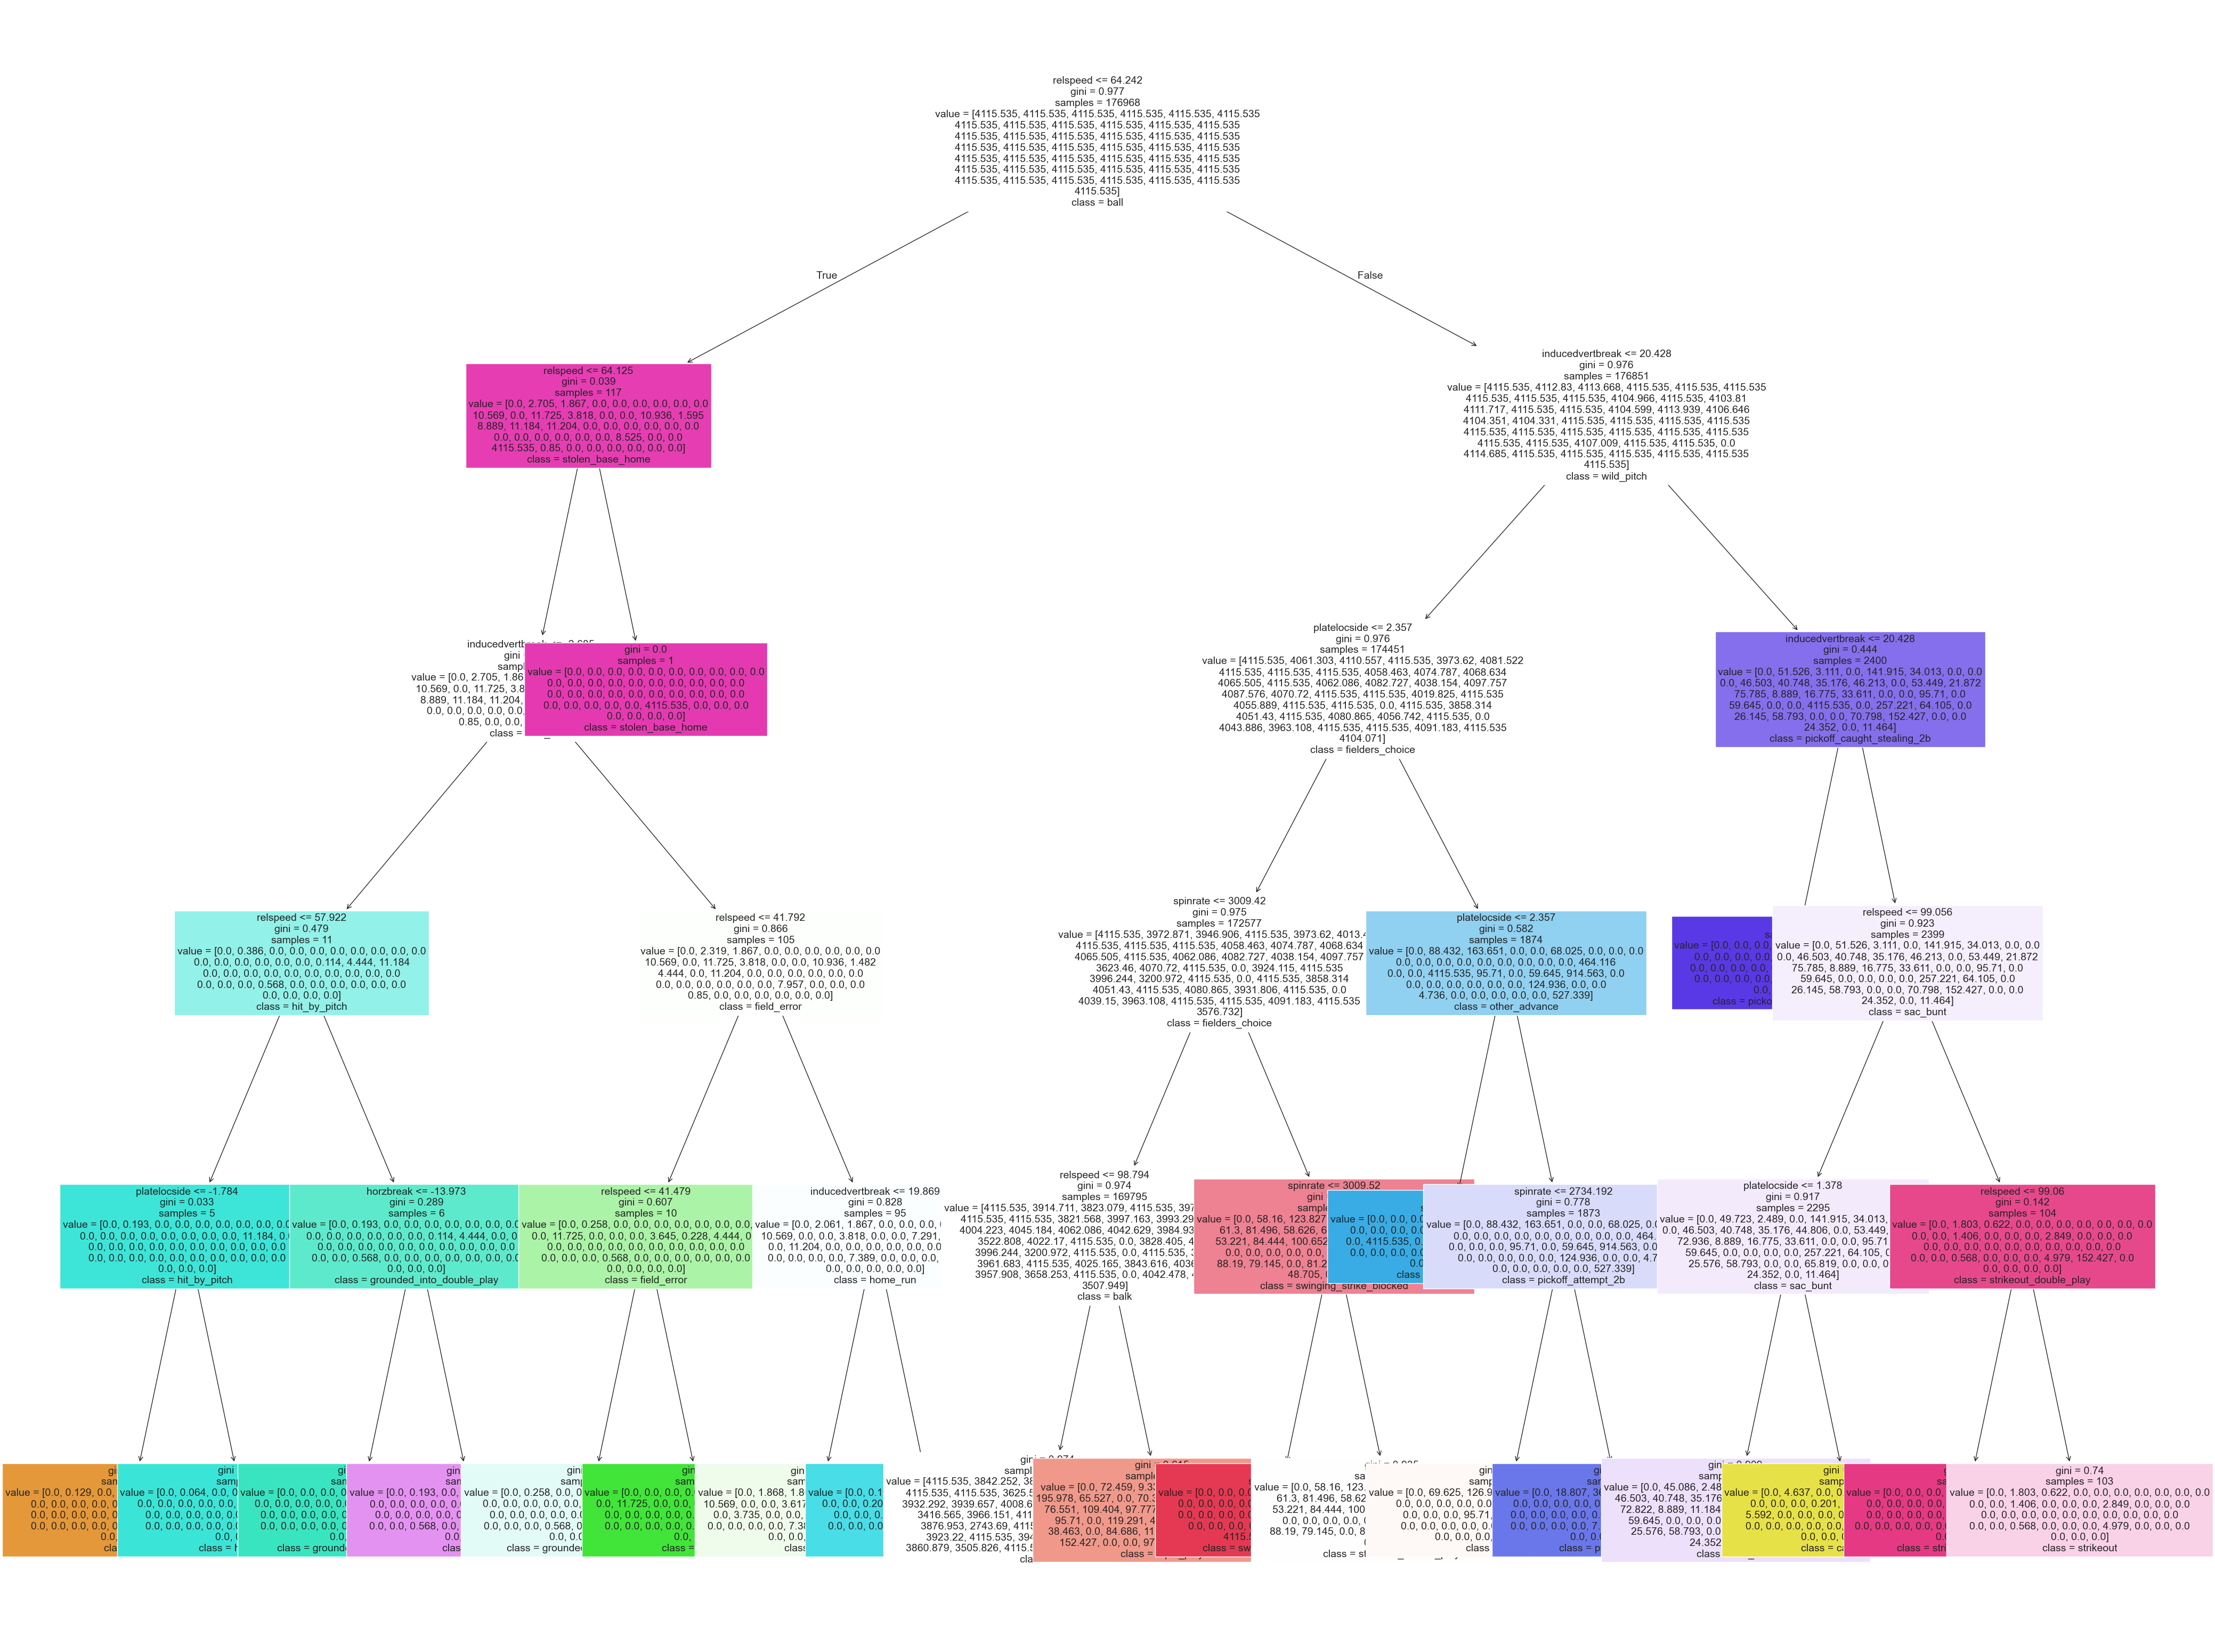

In [13]:
filtered_df = high_pressure_df

# Define the features (pitch characteristics) and target (eventtype)
features = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside']
target = 'eventtype'

X = filtered_df[features]
y = filtered_df[target]

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the class names to a list
class_names = list(clf.classes_)

# Set a much larger figure size and increase font size
plt.figure(figsize=(50, 40))  # Even larger figure
plot_tree(clf, feature_names=features, class_names=class_names, filled=True, fontsize=14)  # Increase font size to 14

plt.show()

In [14]:
filtered_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
7,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,4,4.0,1,1.0,2.0,...,-1.077158,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field
10,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,33,3,4.0,1,0.0,2.0,...,-0.019169,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field
23,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,5,2.0,0,1.0,2.0,...,15.600348,10.791145,-0.211373,1.022123,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
24,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,16,4,2.0,1,1.0,2.0,...,-6.668416,-10.243636,0.270777,-1.181013,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
29,2021/04/21/pitmlb-detmlb-2,2021-04-21 17:40:00,2021-04-21,17:40:00,45,4,6.0,1,1.0,2.0,...,-5.010674,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717549,2023/08/30/atlmlb-colmlb-1,2023-08-31 00:40:00,2023-08-31,00:40:00,37,3,5.0,1,0.0,2.0,...,10.489831,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field
717572,2023/08/30/arimlb-lanmlb-1,2023-08-31 02:10:00,2023-08-31,02:10:00,34,5,4.0,1,1.0,2.0,...,3.854095,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium
717575,2023/09/02/pitmlb-slnmlb-1,2023-09-02 23:15:00,2023-09-02,23:15:00,54,4,7.0,0,1.0,2.0,...,10.798670,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium
717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,2.0,...,15.084946,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park


In [16]:
filtered_df.to_csv('data/filtered_df.csv')

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Filter the data: right-handed pitchers, 2 strikes, 0 or 1 ball(s)
filtered_data = filtered_df[(filtered_df['pitcherthrows'] == 'R') &
                            (filtered_df['strikes'] == 2) &
                            (filtered_df['balls'].isin([0, 1]))]

# Select relevant features and target
features = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']
target = 'pitchresult'  # assuming 'pitchresult' has strikeouts and fieldouts

# Encode the target variable (convert categorical outcomes to numerical values)
encoder = LabelEncoder()
filtered_data['target_encoded'] = encoder.fit_transform(filtered_data[target])

# Prepare the data for training
X = filtered_data[features]
y = filtered_data['target_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, target_names=encoder.classes_)

In [18]:
accuracy

0.3781709825431148

In [19]:
classification_report_output

'              precision    recall  f1-score   support\n\n          *B       0.27      0.29      0.28      2946\n           B       0.66      0.64      0.65     28030\n           C       0.19      0.19      0.19      2947\n           D       0.07      0.07      0.07      3376\n           E       0.04      0.05      0.05      1569\n           F       0.31      0.31      0.31     15414\n           H       0.07      0.08      0.08       325\n           L       0.00      0.00      0.00        30\n           M       0.00      0.00      0.00        17\n           O       0.00      0.00      0.00         1\n           P       0.12      0.20      0.15        10\n           S       0.18      0.18      0.18      9128\n           T       0.03      0.03      0.03       923\n           W       0.18      0.18      0.18      1426\n           X       0.22      0.22      0.22      9702\n\n    accuracy                           0.38     75844\n   macro avg       0.16      0.16      0.16     75844\nweigh

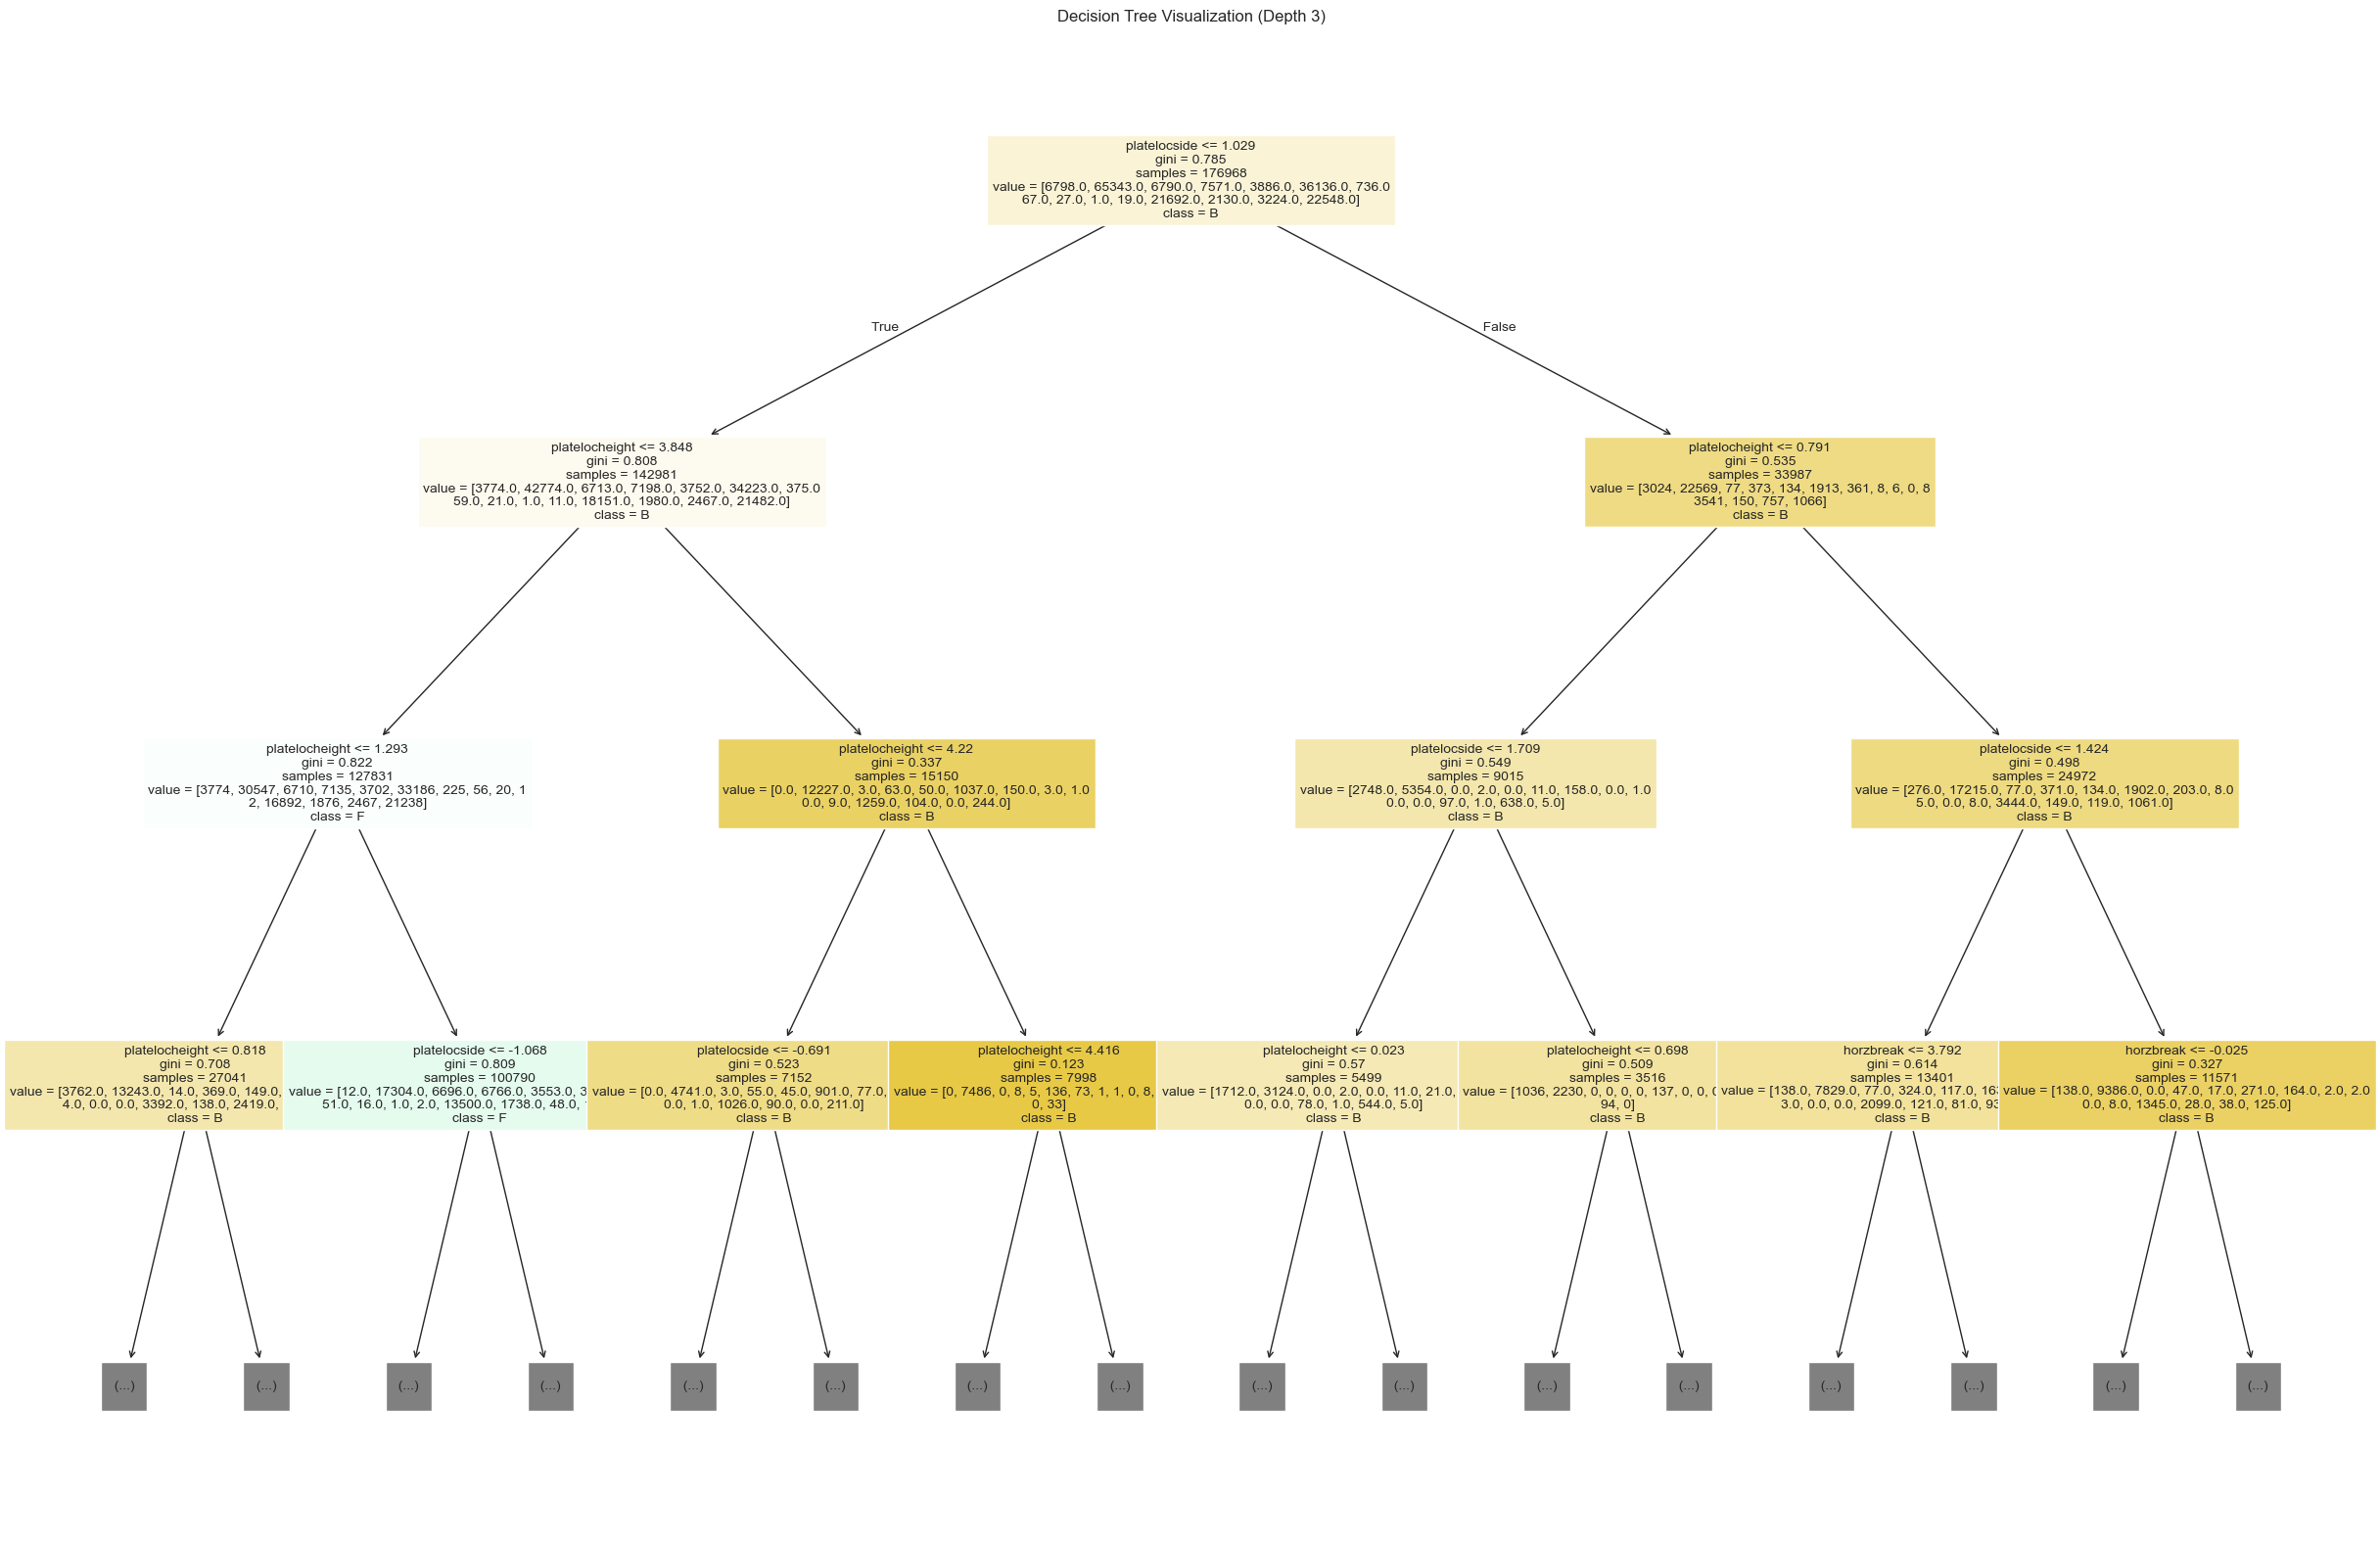

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names=features, class_names=encoder.classes_, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Depth 3)")
plt.show()

In [21]:
import pandas as pd

# Retrieve feature importances from the trained decision tree model
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances in descending order
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [22]:
importance_df.head(10)

,Feature,Importance
0,platelocheight,0.239260
1,platelocside,0.221646
2,inducedvertbreak,0.140221
3,horzbreak,0.139807
4,spinrate,0.129779
5,relspeed,0.129287


In [23]:
encoder.classes_

array(['*B', 'B', 'C', 'D', 'E', 'F', 'H', 'L', 'M', 'O', 'P', 'S', 'T',
       'W', 'X'], dtype=object)

In [24]:
from sklearn.utils import resample

# Filter data to include only relevant outcomes (assuming 'S' as strikeout and 'F' as fieldout for this example)
filtered_data_strike_field = filtered_data[filtered_data['pitchresult'].isin(['S', 'F'])]

# Separate strikeouts and fieldouts for resampling
strikeouts = filtered_data_strike_field[filtered_data_strike_field['pitchresult'] == 'S']
fieldouts = filtered_data_strike_field[filtered_data_strike_field['pitchresult'] == 'F']

# Balance classes through resampling (oversample the smaller class)
if len(strikeouts) > len(fieldouts):
    fieldouts_resampled = resample(fieldouts, replace=True, n_samples=len(strikeouts), random_state=42)
    balanced_data = pd.concat([strikeouts, fieldouts_resampled])
else:
    strikeouts_resampled = resample(strikeouts, replace=True, n_samples=len(fieldouts), random_state=42)
    balanced_data = pd.concat([strikeouts_resampled, fieldouts])

# Encode target variable again
balanced_data['target_encoded'] = encoder.fit_transform(balanced_data['pitchresult'])

# Extract features and target
X_balanced = balanced_data[features]
y_balanced = balanced_data['target_encoded']

# Split balanced data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Train the decision tree on the balanced data
clf_balanced = DecisionTreeClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the balanced test set
y_pred_balanced = clf_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
classification_report_balanced = classification_report(y_test_balanced, y_pred_balanced, target_names=encoder.classes_)

accuracy_balanced, classification_report_balanced


(0.7501778208858714,
 '              precision    recall  f1-score   support\n\n           F       0.80      0.67      0.73     15437\n           S       0.72      0.83      0.77     15493\n\n    accuracy                           0.75     30930\n   macro avg       0.76      0.75      0.75     30930\nweighted avg       0.76      0.75      0.75     30930\n')

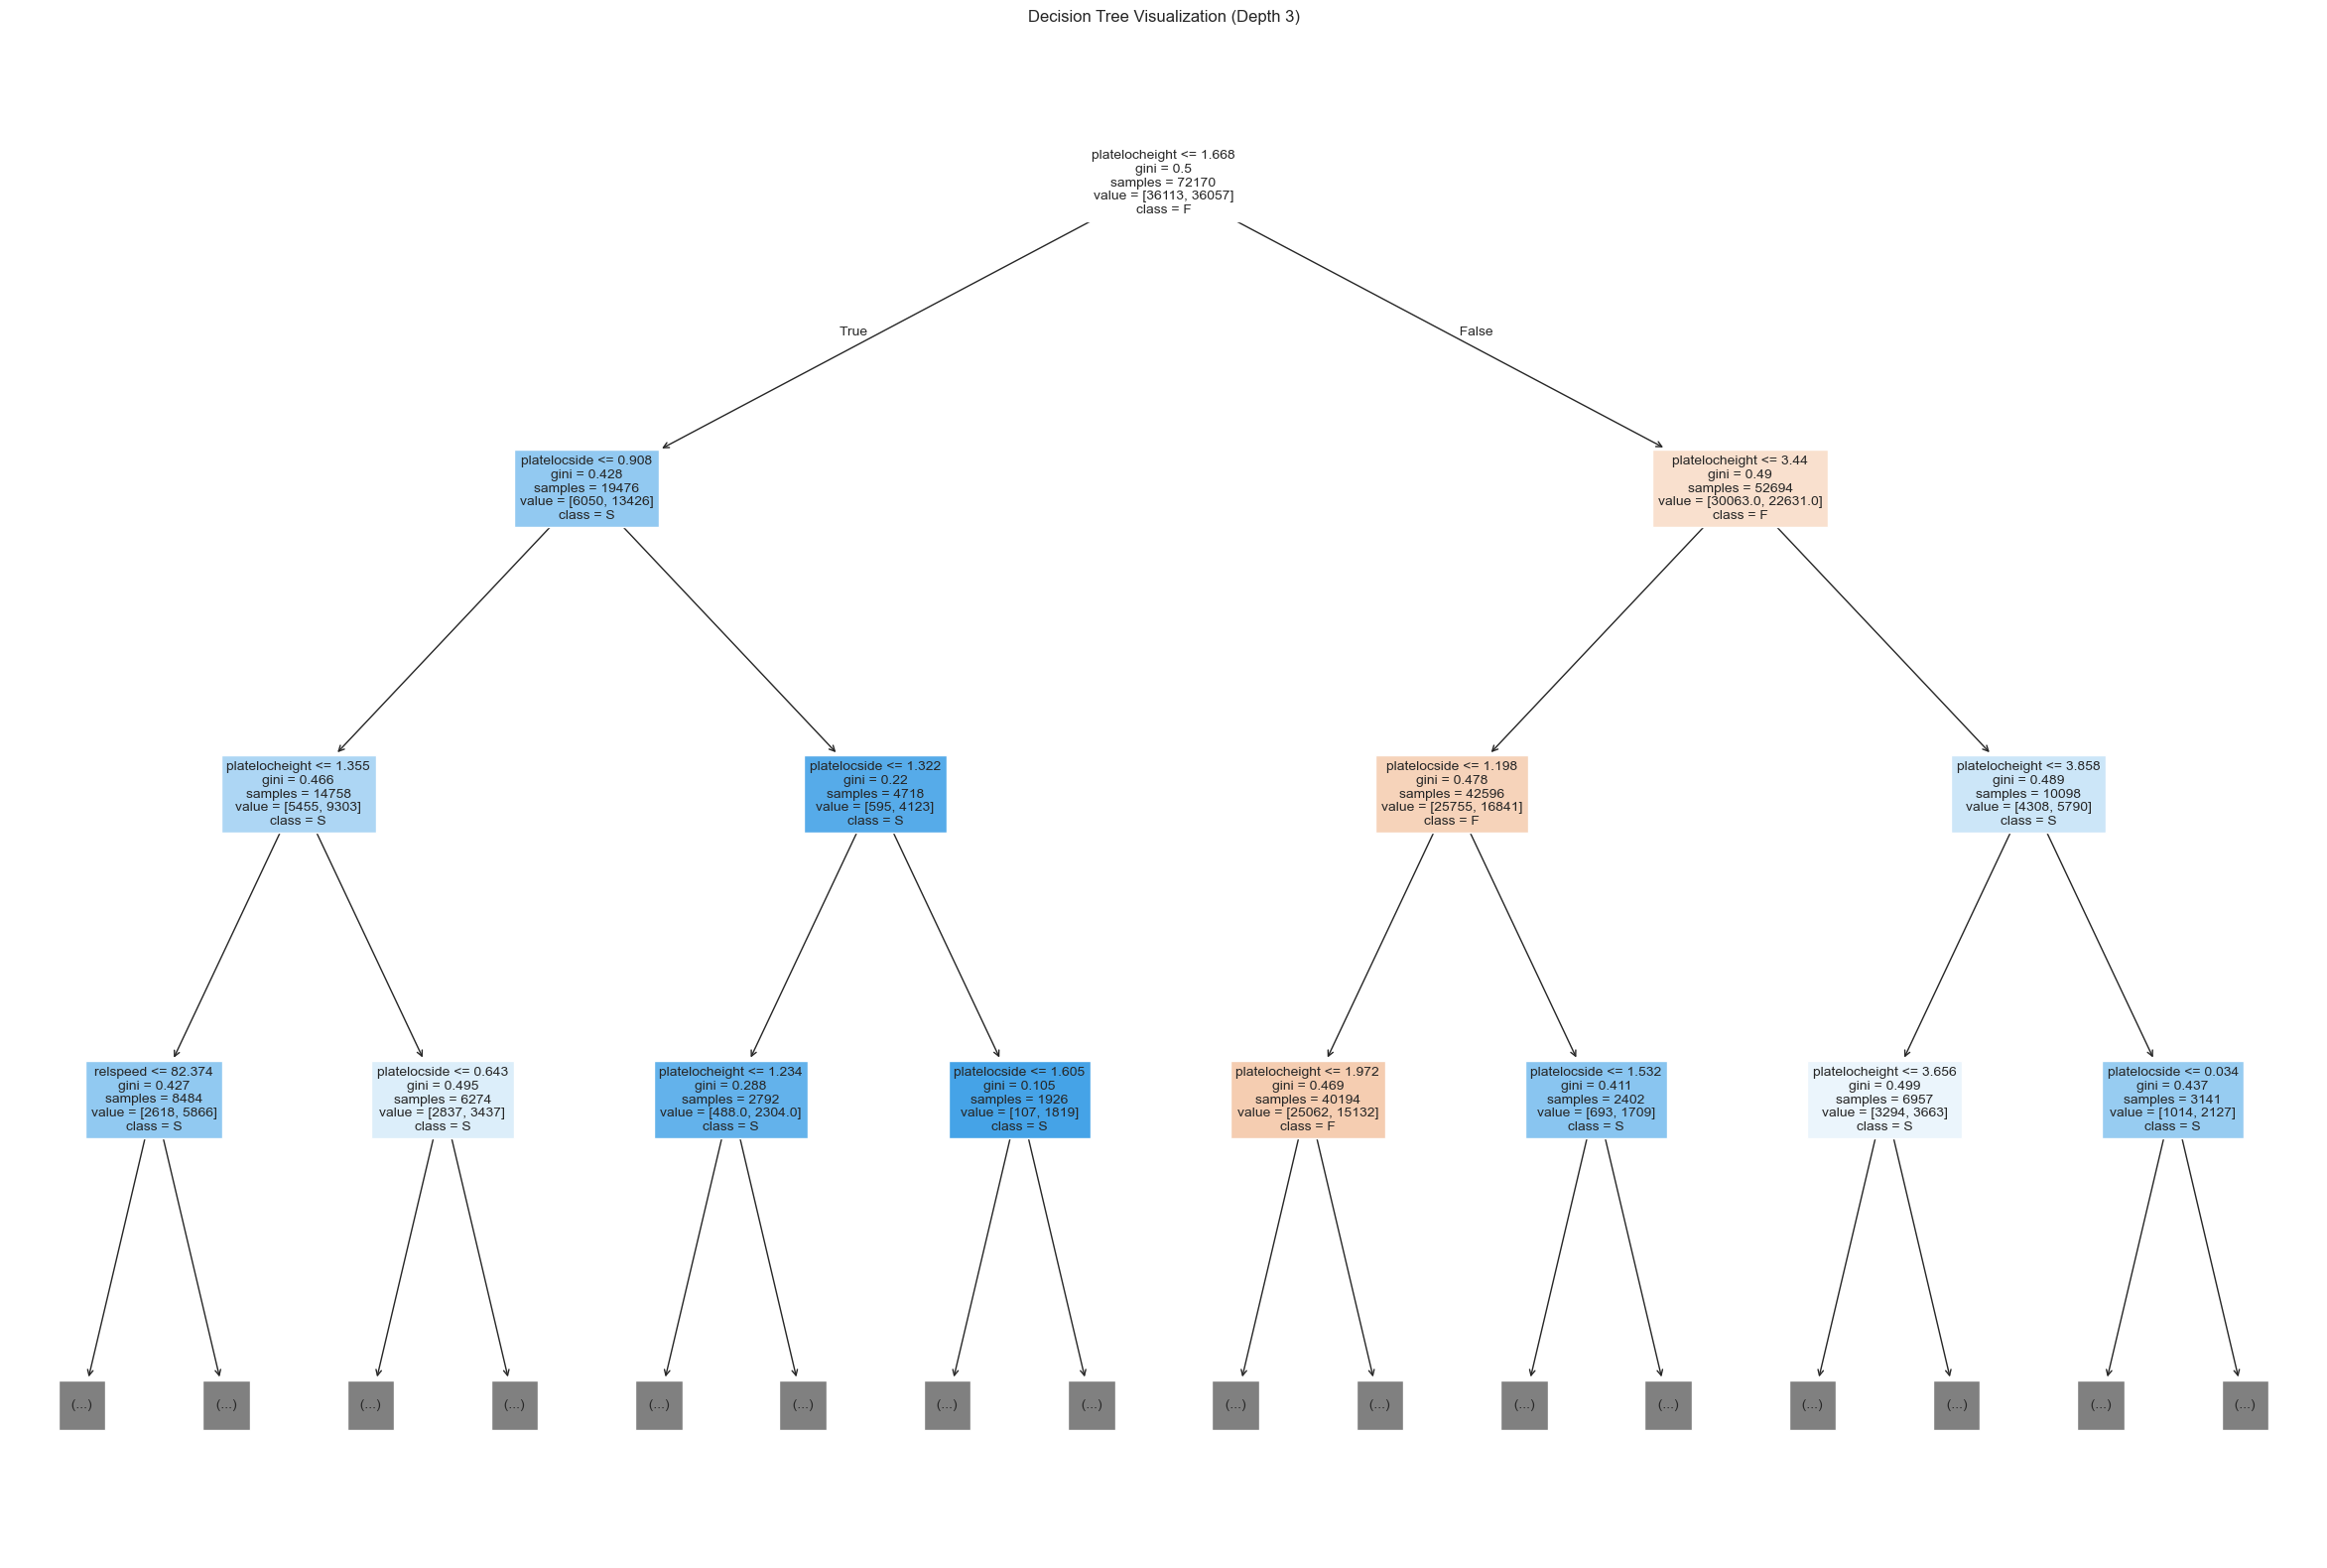

In [25]:
# Set up the plot
plt.figure(figsize=(30, 20))
plot_tree(clf_balanced, feature_names=features, class_names=encoder.classes_, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Depth 3)")
plt.show()

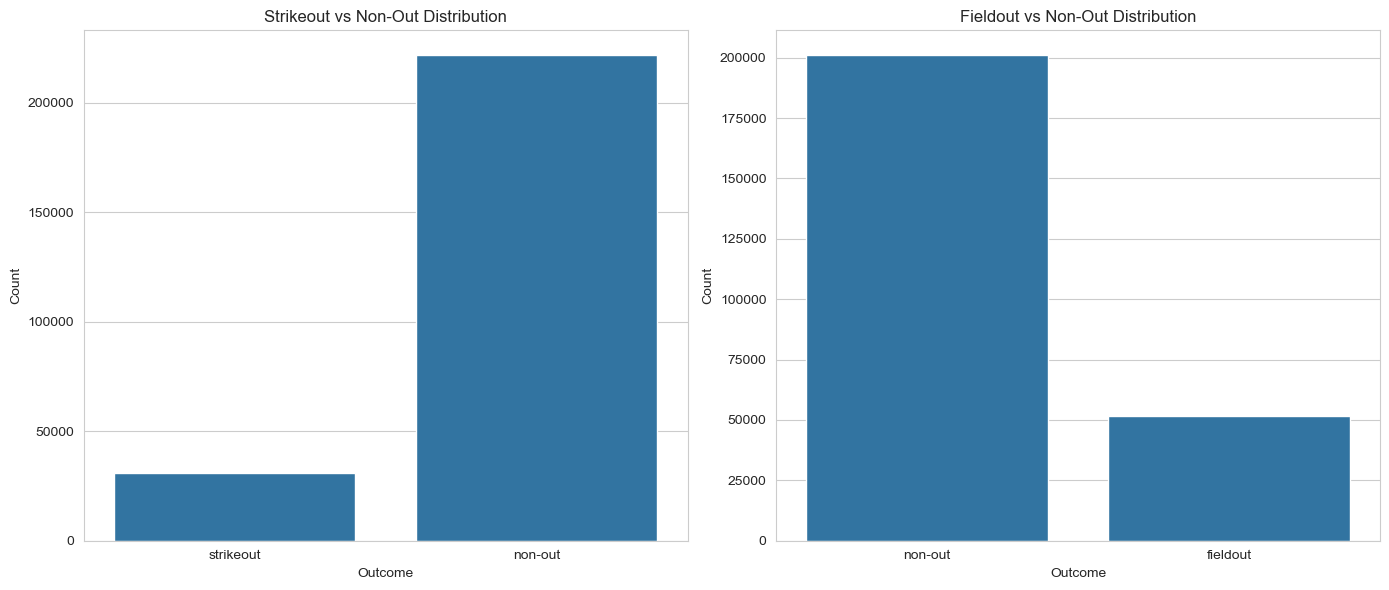

In [26]:
# Define strikeout vs non-out and fieldout vs non-out datasets

# Classify outcomes for each case
strikeout_data = filtered_data.copy()
strikeout_data['binary_outcome'] = strikeout_data['pitchresult'].apply(lambda x: 'strikeout' if x == 'S' else 'non-out')

fieldout_data = filtered_data.copy()
fieldout_data['binary_outcome'] = fieldout_data['pitchresult'].apply(lambda x: 'fieldout' if x == 'F' else 'non-out')

# Plot distribution for each dataset
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Strikeout vs Non-Out distribution
sns.countplot(data=strikeout_data, x='binary_outcome', ax=axs[0])
axs[0].set_title("Strikeout vs Non-Out Distribution")
axs[0].set_xlabel("Outcome")
axs[0].set_ylabel("Count")

# Fieldout vs Non-Out distribution
sns.countplot(data=fieldout_data, x='binary_outcome', ax=axs[1])
axs[1].set_title("Fieldout vs Non-Out Distribution")
axs[1].set_xlabel("Outcome")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [27]:
# Resampling and training models for Strikeout vs Non-Out and Fieldout vs Non-Out

# Step 1: Resample Strikeout vs Non-Out
strikeout_class = strikeout_data[strikeout_data['binary_outcome'] == 'strikeout']
non_out_class_strikeout = strikeout_data[strikeout_data['binary_outcome'] == 'non-out']

# Resample to balance classes for Strikeout vs Non-Out
if len(strikeout_class) > len(non_out_class_strikeout):
    non_out_resampled_strikeout = resample(non_out_class_strikeout, replace=True, n_samples=len(strikeout_class), random_state=42)
    balanced_strikeout_data = pd.concat([strikeout_class, non_out_resampled_strikeout])
else:
    strikeout_resampled = resample(strikeout_class, replace=True, n_samples=len(non_out_class_strikeout), random_state=42)
    balanced_strikeout_data = pd.concat([strikeout_resampled, non_out_class_strikeout])

# Step 2: Resample Fieldout vs Non-Out
fieldout_class = fieldout_data[fieldout_data['binary_outcome'] == 'fieldout']
non_out_class_fieldout = fieldout_data[fieldout_data['binary_outcome'] == 'non-out']

# Resample to balance classes for Fieldout vs Non-Out
if len(fieldout_class) > len(non_out_class_fieldout):
    non_out_resampled_fieldout = resample(non_out_class_fieldout, replace=True, n_samples=len(fieldout_class), random_state=42)
    balanced_fieldout_data = pd.concat([fieldout_class, non_out_resampled_fieldout])
else:
    fieldout_resampled = resample(fieldout_class, replace=True, n_samples=len(non_out_class_fieldout), random_state=42)
    balanced_fieldout_data = pd.concat([fieldout_resampled, non_out_class_fieldout])

# Encoding target for each balanced dataset
balanced_strikeout_data['target_encoded'] = LabelEncoder().fit_transform(balanced_strikeout_data['binary_outcome'])
balanced_fieldout_data['target_encoded'] = LabelEncoder().fit_transform(balanced_fieldout_data['binary_outcome'])

# Extract features and targets
X_strikeout = balanced_strikeout_data[features]
y_strikeout = balanced_strikeout_data['target_encoded']

X_fieldout = balanced_fieldout_data[features]
y_fieldout = balanced_fieldout_data['target_encoded']

# Split into train and test sets
X_train_strikeout, X_test_strikeout, y_train_strikeout, y_test_strikeout = train_test_split(X_strikeout, y_strikeout, test_size=0.3, random_state=42)
X_train_fieldout, X_test_fieldout, y_train_fieldout, y_test_fieldout = train_test_split(X_fieldout, y_fieldout, test_size=0.3, random_state=42)

# Initialize and train Decision Trees for each case
clf_strikeout = DecisionTreeClassifier(random_state=42)
clf_fieldout = DecisionTreeClassifier(random_state=42)

clf_strikeout.fit(X_train_strikeout, y_train_strikeout)
clf_fieldout.fit(X_train_fieldout, y_train_fieldout)

# Evaluate each model
y_pred_strikeout = clf_strikeout.predict(X_test_strikeout)
accuracy_strikeout = accuracy_score(y_test_strikeout, y_pred_strikeout)
classification_report_strikeout = classification_report(y_test_strikeout, y_pred_strikeout)

y_pred_fieldout = clf_fieldout.predict(X_test_fieldout)
accuracy_fieldout = accuracy_score(y_test_fieldout, y_pred_fieldout)
classification_report_fieldout = classification_report(y_test_fieldout, y_pred_fieldout)

accuracy_strikeout, classification_report_strikeout, accuracy_fieldout, classification_report_fieldout


(0.9223700411423766,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.85      0.92     66688\n           1       0.87      0.99      0.93     66508\n\n    accuracy                           0.92    133196\n   macro avg       0.93      0.92      0.92    133196\nweighted avg       0.93      0.92      0.92    133196\n',
 0.8733500057967174,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.96      0.88     60454\n           1       0.95      0.79      0.86     60304\n\n    accuracy                           0.87    120758\n   macro avg       0.89      0.87      0.87    120758\nweighted avg       0.89      0.87      0.87    120758\n')

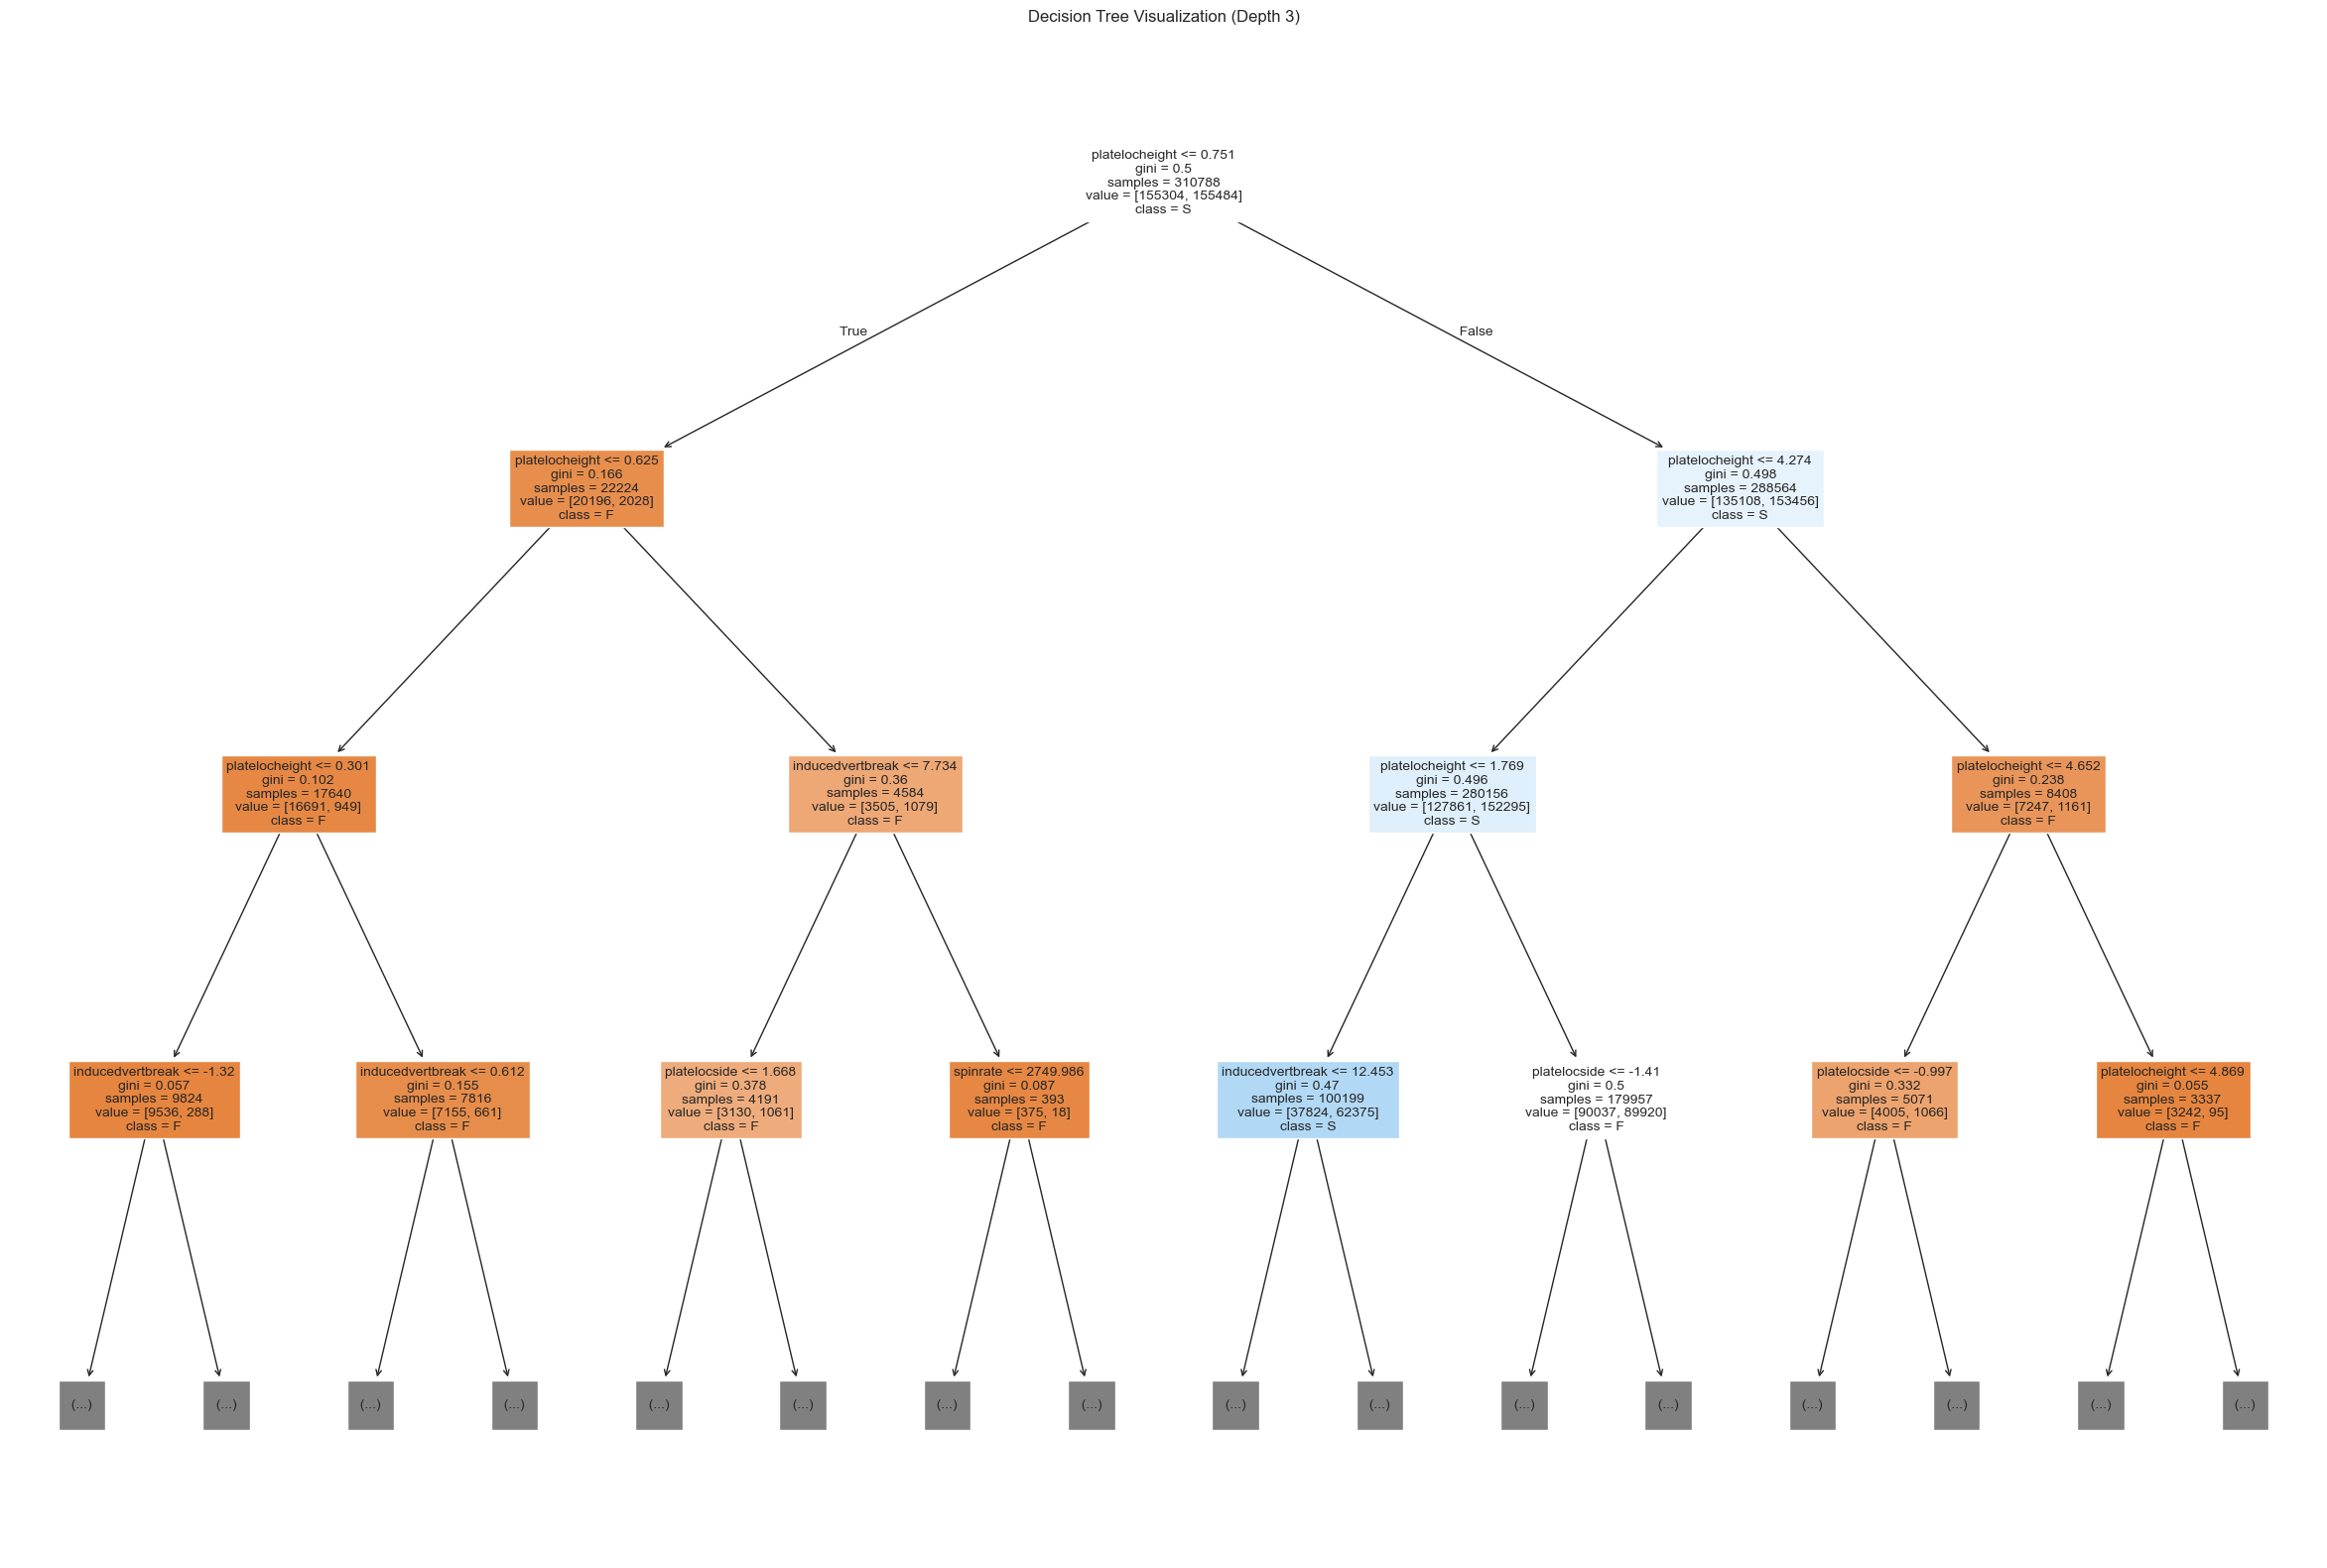

In [28]:
# Set up the plot
plt.figure(figsize=(30, 20))
plot_tree(clf_strikeout, feature_names=features, class_names=encoder.classes_, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (Depth 3)")
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv('data/filtered_df.csv')

# Data Filtering for specific conditions
filtered_df = df[(df['strikes'] == 2) & (df['balls'] <= 1) & (df['pitcherthrows'] == 'R')]

# Creating a binary target for strikeouts
# Assuming 'eventtype' contains descriptive names, like 'strikeout', 'groundout', etc.
filtered_df['strikeout'] = filtered_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)

# Feature selection and target definition
features = ['spinrate', 'horzbreak', 'inducedvertbreak', 'platelocheight', 'relspeed']
target = 'strikeout'

X = filtered_df[features]
y = filtered_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Gradient Boosting (XGBoost)
gbm = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print(classification_report(y_test, y_pred_gbm))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90     40974
           1       0.00      0.00      0.00      9589

    accuracy                           0.81     50563
   macro avg       0.41      0.50      0.45     50563
weighted avg       0.66      0.81      0.73     50563

Accuracy: 0.8103356209085695
            Feature  Importance
3    platelocheight    0.535971
2  inducedvertbreak    0.142341
0          spinrate    0.118463
4          relspeed    0.109826
1         horzbreak    0.093398
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     40974
           1       0.37      0.00      0.00      9589

    accuracy                           0.81     50563
   macro avg       0.59      0.50      0.45     50563
weighted avg       0.73      0.81      0.73     50563



In [47]:
# Load and filter the dataset
df = pd.read_csv('data/filtered_df.csv')
filtered_df = df[(df['strikes'] == 2) & (df['balls'] <= 1) & (df['pitcherthrows'] == 'R') & (df['pitchname'] == 'FF')]
filtered_df 

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
6,37,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,3,2.0,0,0.0,...,3.280700,13.794325,1.286732,2.807080,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
16,87,2021/04/18/chamlb-bosmlb-1,2021-04-18 13:10:00,2021-04-18,13:10:00,23,3,4.0,0,0.0,...,9.286347,7.589095,0.122586,2.129726,111,Boston Red Sox,145,Chicago White Sox,3,Fenway Park
20,114,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,40,4,5.0,1,1.0,...,-2.640007,12.777637,0.605103,2.710316,115,Colorado Rockies,121,New York Mets,19,Coors Field
24,159,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,39,3,5.0,1,0.0,...,-1.548159,14.088516,0.863349,2.963855,115,Colorado Rockies,121,New York Mets,19,Coors Field
25,173,2021/04/18/chamlb-bosmlb-1,2021-04-18 13:10:00,2021-04-18,13:10:00,14,4,3.0,0,1.0,...,4.559521,8.560932,0.081136,1.821791,111,Boston Red Sox,145,Chicago White Sox,3,Fenway Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252803,717535,2023/09/03/miamlb-wasmlb-1,2023-09-03 17:35:00,2023-09-03,17:35:00,10,3,1.0,1,0.0,...,13.290255,14.944304,-0.707683,3.001816,120,Washington Nationals,146,Miami Marlins,3309,Nationals Park
252804,717540,2023/08/30/clemlb-minmlb-1,2023-08-30 17:10:00,2023-08-30,17:10:00,45,4,6.0,1,1.0,...,5.813662,19.101568,-0.477500,4.648829,142,Minnesota Twins,114,Cleveland Guardians,3312,Target Field
252808,717572,2023/08/30/arimlb-lanmlb-1,2023-08-31 02:10:00,2023-08-31,02:10:00,34,5,4.0,1,1.0,...,3.854095,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium
252809,717575,2023/09/02/pitmlb-slnmlb-1,2023-09-02 23:15:00,2023-09-02,23:15:00,54,4,7.0,0,1.0,...,10.798670,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium


In [48]:
filtered_df.shape

(79634, 33)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Load and filter the dataset
df = pd.read_csv('data/filtered_df.csv')
filtered_df = df[(df['strikes'] == 2) & (df['balls'] <= 1) & (df['pitcherthrows'] == 'R') & (df['pitchname'] == 'FF')]

# Creating a binary target for strikeouts
filtered_df['strikeout'] = filtered_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)

# Feature selection and target definition
features = ['spinrate', 'horzbreak', 'inducedvertbreak', 'platelocheight', 'relspeed']
target = 'strikeout'

X = filtered_df[features]
y = filtered_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standard scaling for numerical features
scaler = StandardScaler()

# XGBoost Model with GridSearch for Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create a pipeline to combine scaling and modeling
pipeline = Pipeline([
    ('scaler', scaler),
    ('xgb', xgb_model)
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predictions and Evaluation
y_pred = best_model.predict(X_test)
print("Classification Report for XGBoost (SMOTE & GridSearch):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Best parameters from GridSearch
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_55754/1166595882.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['strikeout'] = filtered_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:45:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaco

Classification Report for XGBoost (SMOTE & GridSearch):
              precision    recall  f1-score   support

           0       0.86      0.61      0.71     13097
           1       0.23      0.53      0.32      2830

    accuracy                           0.60     15927
   macro avg       0.54      0.57      0.52     15927
weighted avg       0.75      0.60      0.64     15927

Accuracy: 0.5977899164940039
Best Parameters: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}


In [31]:
df

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,7,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,4,4.0,1,1.0,...,-1.077158,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,10,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,33,3,4.0,1,0.0,...,-0.019169,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,23,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,12,5,2.0,0,1.0,...,15.600348,10.791145,-0.211373,1.022123,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
3,24,2021/04/25/arimlb-atlmlb-1,2021-04-25 12:20:00,2021-04-25,12:20:00,16,4,2.0,1,1.0,...,-6.668416,-10.243636,0.270777,-1.181013,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park
4,29,2021/04/21/pitmlb-detmlb-2,2021-04-21 17:40:00,2021-04-21,17:40:00,45,4,6.0,1,1.0,...,-5.010674,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252807,717549,2023/08/30/atlmlb-colmlb-1,2023-08-31 00:40:00,2023-08-31,00:40:00,37,3,5.0,1,0.0,...,10.489831,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field
252808,717572,2023/08/30/arimlb-lanmlb-1,2023-08-31 02:10:00,2023-08-31,02:10:00,34,5,4.0,1,1.0,...,3.854095,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium
252809,717575,2023/09/02/pitmlb-slnmlb-1,2023-09-02 23:15:00,2023-09-02,23:15:00,54,4,7.0,0,1.0,...,10.798670,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium
252810,717579,2023/09/02/nyamlb-houmlb-1,2023-09-02 23:10:00,2023-09-02,23:10:00,60,4,7.0,1,0.0,...,15.084946,12.236399,-0.442674,2.006670,117,Houston Astros,147,New York Yankees,2392,Minute Maid Park


In [32]:
# Gradient Boosting with XGBoost and scale_pos_weight
strikeout_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
gbm = xgb.XGBClassifier(n_estimators=500, max_depth=10, learning_rate=0.1, random_state=42, scale_pos_weight=strikeout_ratio)
gbm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gbm = gbm.predict(X_test)
print("Classification Report for XGBoost (scale_pos_weight):")
print(classification_report(y_test, y_pred_gbm))
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))


Classification Report for XGBoost (scale_pos_weight):
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     40893
           1       0.25      0.37      0.30      9670

    accuracy                           0.66     50563
   macro avg       0.54      0.55      0.54     50563
weighted avg       0.72      0.66      0.68     50563

Accuracy: 0.6611553903051639


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Load and filter the dataset
df = pd.read_csv('data/filtered_df.csv')
filtered_df = df[(df['strikes'] == 2) & (df['balls'] <= 1) & (df['pitcherthrows'] == 'R') & (df['pitchname'] == 'FF')]

# Creating a binary target for strikeouts
filtered_df['strikeout'] = filtered_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)

# Feature selection and target definition
features = ['spinrate', 'horzbreak', 'inducedvertbreak', 'platelocheight', 'relspeed']
target = 'strikeout'

X = filtered_df[features]
y = filtered_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links to remove noisy data points
tomek = TomekLinks()
X_train_cleaned, y_train_cleaned = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

# Standard scaling for numerical features
scaler = StandardScaler()

# XGBoost Model with Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create a pipeline to combine scaling and modeling
pipeline = Pipeline([
    ('scaler', scaler),
    ('xgb', xgb_model)
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predictions and Evaluation
y_pred = best_model.predict(X_test)
print("Classification Report for XGBoost (ADASYN + Tomek Links):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Best parameters from GridSearch
print("Best Parameters:", grid_search.best_params_)


/var/folders/3w/q_m3rh1s5xv5bh0kfpcqmd9r0000gn/T/ipykernel_55754/4248751866.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['strikeout'] = filtered_df['eventtype'].apply(lambda x: 1 if x == 'strikeout' else 0)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:50:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

Classification Report for XGBoost (ADASYN + Tomek Links):
              precision    recall  f1-score   support

           0       0.86      0.61      0.71     13097
           1       0.23      0.53      0.32      2830

    accuracy                           0.59     15927
   macro avg       0.54      0.57      0.51     15927
weighted avg       0.75      0.59      0.64     15927

Accuracy: 0.5933948640673071
Best Parameters: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}


In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_cleaned, y_train_cleaned)
y_pred_logreg = log_reg.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.54      0.66     13097
           1       0.21      0.55      0.30      2830

    accuracy                           0.54     15927
   macro avg       0.53      0.55      0.48     15927
weighted avg       0.73      0.54      0.60     15927

Accuracy (Logistic Regression): 0.5427261882338168


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: BalancedBaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [33]:
strikeout_ratio

4.229180132895519

In [35]:
# Gradient Boosting with XGBoost and scale_pos_weight
strikeout_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
gbm = xgb.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42, scale_pos_weight= 3.23)
gbm.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_gbm = gbm.predict(X_test)
print("Classification Report for XGBoost (scale_pos_weight):")
print(classification_report(y_test, y_pred_gbm))
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))

Classification Report for XGBoost (scale_pos_weight):
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     40893
           1       0.27      0.31      0.29      9670

    accuracy                           0.70     50563
   macro avg       0.55      0.55      0.55     50563
weighted avg       0.72      0.70      0.71     50563

Accuracy: 0.7027668453216779
